In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

##### Logistic Reggression

In this notebook, I took an approach of combining both datasets together and then applying the logistic regression of the whole 80 frames (80*29) frequencies. I used logistic regression on hold out method (66/33 split) for model validation.

This approach is not optimal as we are working on all frames at once and according to task description, we should assume that hearing aid software won't be able to store simultaneously 80 frames.

Log Reg on whole 80 frames - 66/33 split.
Precision: 0.748
Recall: 0.711
Accuracy: 0.733
F1 Score: 0.729

ToDo:
- cross validation instead of hold out
- same approach for per one frame

In [4]:
music_data = np.load('../Data/music_data.npy')
other_data = np.load('../Data/other_data.npy')
test_data = np.load('../Data/test_data.npy')


In [5]:
music_test = music_data.reshape(10500,-1)

In [6]:
df_music_data = pd.DataFrame(music_test)

In [7]:
df_music_data['music'] = 1

In [8]:
df_music_data.head()

,0,1,2,3,4,5,6,7,8,9,...,2361,2362,2363,2364,2365,2366,2367,2368,2369,music
0,-21.993446,-17.977962,-17.141218,-18.309723,-17.927362,-21.108173,-26.663544,-25.536222,-23.206236,-15.725655,...,-46.144531,-48.764130,-49.762756,-51.825996,-53.202705,-54.615028,-55.584236,-56.645790,-59.415306,1
1,-34.046669,-33.166168,-36.468540,-38.980652,-37.853809,-42.472706,-42.061226,-42.769325,-38.113968,-39.180336,...,-42.551735,-23.302713,-25.793324,-45.112831,-53.991703,-54.217861,-53.082687,-54.731834,-55.277069,1
2,-25.891249,-23.328953,-27.911751,-25.140963,-23.924210,-23.433268,-24.008764,-24.425587,-24.350222,-23.242916,...,-71.163605,-71.038246,-72.072617,-72.676178,-71.765038,-72.102455,-71.244751,-72.347015,-65.960922,1
3,-3.462323,-6.742817,-6.242500,-7.403340,-5.884489,-5.922623,-6.977041,-5.566399,-7.112865,-4.286470,...,-48.066814,-58.186184,-60.817299,-63.273563,-64.623901,-66.006592,-67.566788,-68.166122,-66.800552,1
4,-17.596451,-17.338633,-17.647360,-18.038160,-18.420048,-18.803257,-18.825764,-19.566700,-19.965010,-20.589912,...,-47.430668,-58.723381,-50.874023,-44.225060,-26.171467,-28.248520,-35.932274,-44.705933,-50.666470,1


In [9]:
other_test = other_data.reshape(10500,-1)

In [10]:
df_other_data = pd.DataFrame(other_test)

In [11]:
df_other_data['music'] = 0

In [12]:
df_other_data.head()

,0,1,2,3,4,5,6,7,8,9,...,2361,2362,2363,2364,2365,2366,2367,2368,2369,music
0,-12.951244,-11.308525,-13.872219,-13.806589,-12.326376,-12.395161,-11.166784,-10.971886,-7.559437,-11.055162,...,-34.709663,-33.153778,-35.461121,-37.104607,-34.567741,-34.706070,-32.850998,-34.640739,-35.696678,0
1,-21.422386,-27.252789,-29.564075,-18.175779,-21.586081,-19.282009,-13.106285,-12.567467,-22.103884,-56.247185,...,-71.899994,-75.194450,-45.378941,-33.228779,-31.649435,-35.803104,-54.357098,-65.877151,-67.245491,0
2,-16.394987,-15.494066,-16.002287,-13.802824,-14.474581,-16.924006,-15.349585,-16.244314,-16.023439,-13.479856,...,-44.867012,-45.205353,-45.978165,-47.146141,-46.689491,-44.163551,-30.645712,-31.339880,-34.886955,0
3,-11.027889,-11.154048,-6.127076,-6.312937,-6.288032,-5.856016,-3.175152,-6.067807,-3.524928,-2.822677,...,-43.309559,-43.536396,-44.214134,-43.577995,-38.319832,-40.947815,-41.789116,-42.402397,-41.973606,0
4,-8.452057,-8.815509,-8.869548,-8.884717,-9.064394,-9.111485,-9.165651,-9.220041,-8.851582,-8.238811,...,-76.544907,-77.170090,-77.832642,-76.168518,-76.827133,-77.866531,-77.024155,-72.583847,-57.853168,0


In [13]:
result = df_music_data.append(df_other_data, ignore_index=True)

In [14]:
y = result['music']

In [15]:
X = result.drop('music',1)

/tmp/ipykernel_58661/1299319965.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = result.drop('music',1)


In [16]:
y

0        1
1        1
2        1
3        1
4        1
        ..
20995    0
20996    0
20997    0
20998    0
20999    0
Name: music, Length: 21000, dtype: int64

In [17]:
X

,0,1,2,3,4,5,6,7,8,9,...,2360,2361,2362,2363,2364,2365,2366,2367,2368,2369
0,-21.993446,-17.977962,-17.141218,-18.309723,-17.927362,-21.108173,-26.663544,-25.536222,-23.206236,-15.725655,...,-44.439888,-46.144531,-48.764130,-49.762756,-51.825996,-53.202705,-54.615028,-55.584236,-56.645790,-59.415306
1,-34.046669,-33.166168,-36.468540,-38.980652,-37.853809,-42.472706,-42.061226,-42.769325,-38.113968,-39.180336,...,-44.047035,-42.551735,-23.302713,-25.793324,-45.112831,-53.991703,-54.217861,-53.082687,-54.731834,-55.277069
2,-25.891249,-23.328953,-27.911751,-25.140963,-23.924210,-23.433268,-24.008764,-24.425587,-24.350222,-23.242916,...,-72.625366,-71.163605,-71.038246,-72.072617,-72.676178,-71.765038,-72.102455,-71.244751,-72.347015,-65.960922
3,-3.462323,-6.742817,-6.242500,-7.403340,-5.884489,-5.922623,-6.977041,-5.566399,-7.112865,-4.286470,...,-47.922684,-48.066814,-58.186184,-60.817299,-63.273563,-64.623901,-66.006592,-67.566788,-68.166122,-66.800552
4,-17.596451,-17.338633,-17.647360,-18.038160,-18.420048,-18.803257,-18.825764,-19.566700,-19.965010,-20.589912,...,-38.416481,-47.430668,-58.723381,-50.874023,-44.225060,-26.171467,-28.248520,-35.932274,-44.705933,-50.666470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20995,-9.625339,-4.711493,-7.118691,-7.985616,-8.197793,-8.628098,-8.960226,-9.723042,-11.012020,-11.652954,...,-58.919022,-52.254784,-50.101288,-47.473263,-53.604668,-54.604248,-71.272980,-53.362411,-60.459553,-57.449669
20996,-10.064594,-10.218120,-10.337578,-10.989929,-11.452061,-12.001469,-11.277685,-9.874556,-9.846560,-23.487291,...,-53.087162,-65.728088,-65.454437,-64.580589,-62.402721,-67.810989,-72.493240,-73.855225,-73.836853,-74.788513
20997,-13.684791,-23.725082,-39.996746,-43.435543,-17.836161,-10.960764,-12.338741,-22.053444,-34.731285,-35.392685,...,-50.255096,-51.687828,-59.688789,-72.481133,-42.980705,-49.872421,-52.727730,-57.499763,-40.432114,-35.280388
20998,-8.221676,-3.826855,-4.183208,-2.479219,-2.954268,-4.505608,-7.363546,-7.801313,-4.334417,-1.958509,...,-60.671692,-59.860588,-61.301941,-61.039825,-61.444168,-62.015213,-61.960625,-60.198456,-60.934303,-61.711594


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [19]:
clf = LogisticRegression(random_state=0,max_iter=30000).fit(X_train, y_train)

/home/tk/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


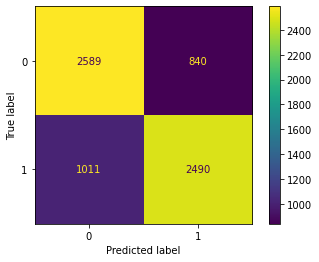

In [20]:
plot_confusion_matrix(clf, X_test, y_test) 

In [21]:
y_pred = clf.predict(X_test)

In [22]:
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))

NameError: name 'precision_score' is not defined